<a href="https://colab.research.google.com/github/suhyeon03/study_ML_/blob/main/_classification_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 분류(Classification)

In [ ]:
# 지도 학습은 레이블(Label), 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식이다.
# 지도학습의 대표적인 유형인 분류는 학습 데이터로 주어진 데이터의 피처와 레이블 값을 머신러닝 알고리즘으로 학습해 모델을 생성하고,
# 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을때 미지의 레이블 값을 예측하는 것이다.
# 다양한 알고리즘이 있지만 이번 장은 앙상블 기법을 집중적으로 다룬다.
# 이미지, 음성, NPL 영역에서 신경망에 기반한 딥러닝이 머신러닝계를 선도하지만 이를 제외한 정형 데이터의 예측 분석 영역에서는 앙상블이 매우 높은 예측 성능으로 인해
# 많은 분석사와 데이터 과학자들에게 애용되고 있다.
# 일반적으로 앙상블은 배깅 방식과 부스팅 방식이 있다.
# 앙상블의 기본 알고리즘으로 일반적으로 사용하는 것은 결정 트리이다.

#2. 결정트리


In [ ]:
# 결정트리(Decicion)는 ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘이다.
# 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리기반의 분류 규칙을 만든다. -> 정보의 균일도만 신경쓰면 된다. -> 과적합의 문제가 생김
# 정보의 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득지수와 지니계수가 있다.
# 정보 이득지수는 서로 다른 값이 섞여있으면 엔트로피가 높고, 같은 값이 섞여있으면 엔트로피는 낮다.
# 지니 계수는 낮을수록 데이터 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할한다.
# -> 결정트리알고리즘을 사이킷런에선 기본적으로 지니게수를 이용해 데이터를 분할한다.

In [ ]:
# 장점은 직관적이고 쉽다. 피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않다.
# 피처정보의 균일도에 따른 룰 규칙으로 서브트리를 계속 만들다 보면 피처가 많고 균일도가 다양하게 존재할수록 트리의 깊이가 커지고 복잡해진다.
# 모든 데이터 상황을 만족하는 완벽한 규칙은 만들지 못하는 경우가 오히려 더 많음에도 불구하고 정확도를 위해 계속해서 조건을 추가하고 트리 깊이가 커지고, 결과적으론 복잡한 모델이 된다.
# 그래서 복잡한 모델은 실제 상황에 테스트 데이터세트에 유연하게 대처하지 못해 예측 성능이 떨어진다.
# -> 즉, 완벽한 규칙은 만들 수 없다를 인정하고 트리의 크기를 사전에 제한 하는 것이 오히려 성능 튜닝에 도움이 된다.

##2-1.결정트리 모델의 시각화


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156) #(, min_samples_split, max_depth, min_samples_leaf )

# 붗꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습.
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,
                feature_names = iris_data.feature_names, impurity=True, filled=True)

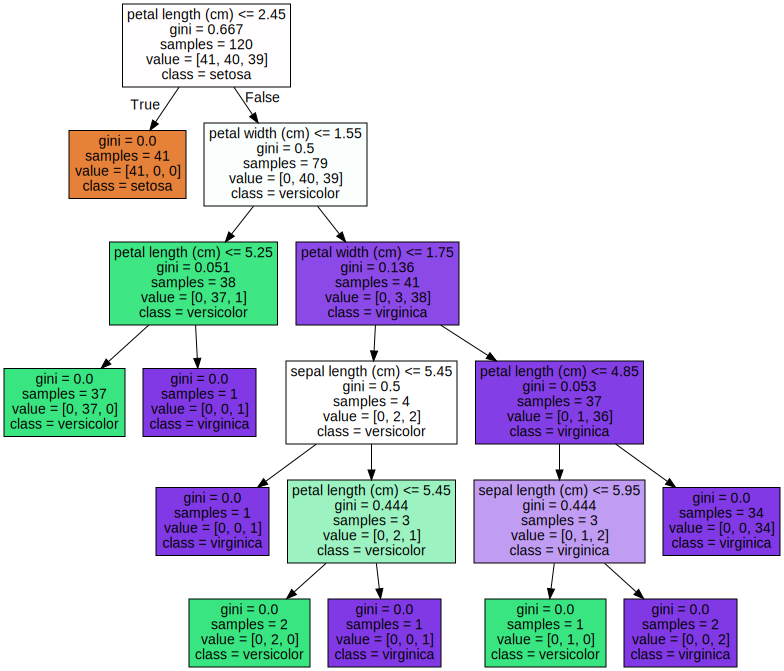

In [ ]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

In [ ]:
# petal length (cm) <= 2.45와 같은 것은 자식 노드를 만들기 위한 규칙 조건이다. 없다면 리프노드이다.
# gini는 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수이다.
# samples는 현 규칙에 해당하는 데이터 건수다.
# value = []는 클래스 값 기반 데이터 건수다.
# class=[]는 하위 노드를 가질 경우에 []의 데이터가 제일 많다는 것이다.
# 각 노드의 색깔은 붓꽃 데이터의 레이블 값을 의미한다.
# -> 색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 의미이다.

In [ ]:
# 과적합 방지 파리미터
# max_features : 피처 개수를 제한할 수 있다. -> 수가 많아지면 분할이 많아짐
# min_samples_split : 최소한의 데이터 수로 과적합을 제어함
# max_depth : None으로 설정하면 완벽하게 클래스 결정 값이 될때까지 깊이를 계속 키우거나 min_samples_split보다 작아질때까지 깊어진다.
            # -> 적절한 깊이로 설정해야한다.
# min_samples_leaf : 노드가 분할될 경우 자식 노드들이 모두 샘플 데이터 건수가 4 이상을 만족할 수 있는지를 확인한 후에 분할을 수행하게 된다.

In [ ]:
dt_clf.feature_importances_


array([0.02500521, 0.        , 0.55490281, 0.42009198])

##2-2. 피처중요도



Feature importances : /n[0.025 0.    0.555 0.42 ]
sepal length (cm):0.025
sepal width (cm):0.000
petal length (cm):0.555
petal width (cm):0.420


<Axes: >

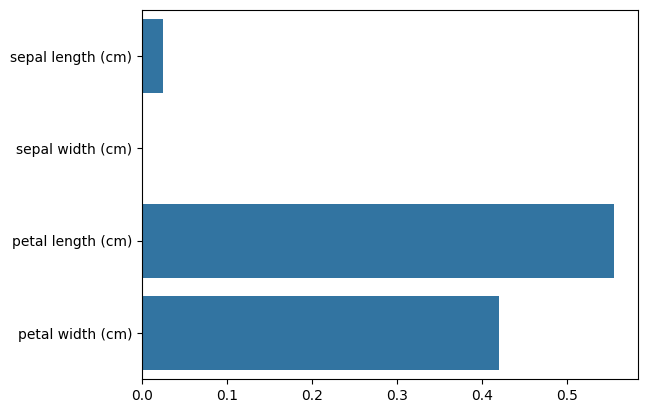

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# features importance 추출
print("Feature importances : /n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# features별 importance 추출
for name , value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print("{0}:{1:.3f}".format(name,value))

# features importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

##2-3. 결정 트리 과적합 (Overfitting)

In [ ]:
# 오버피팅은 모델이 학습 데이터(training data)에 지나치게 최적화되어, 새로운 데이터(테스트 데이터)에는 제대로 작동하지 않는 현상이다.
# 언더피팅은 언더피팅은 모델이 학습 데이터조차 제대로 학습하지 못하는 현상이다. 모델이 너무 단순해서 훈련 데이터에서도 성능이 좋지 않은 경우다.

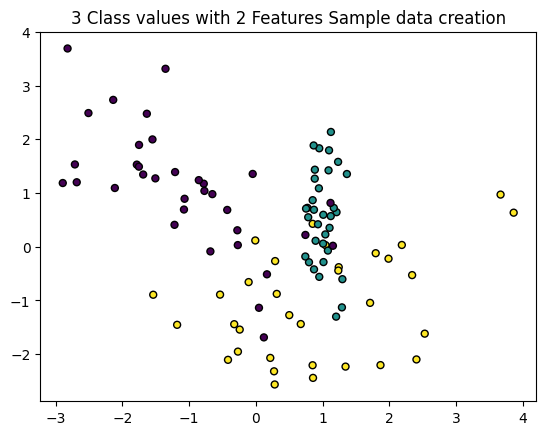

In [ ]:
from sklearn.datasets import make_classification # 샘플데이터를 만들어주는 라이브러리다.
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolors='k')


In [ ]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

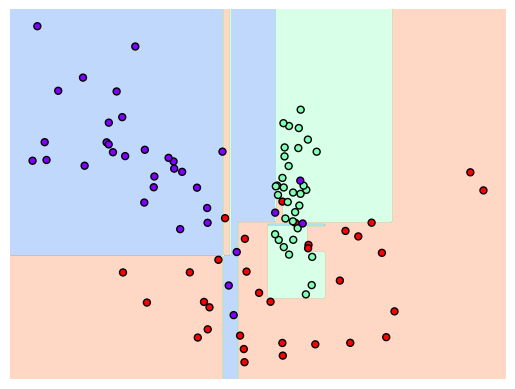

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)


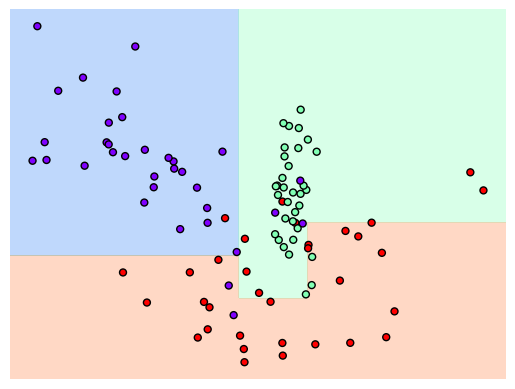

In [ ]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

##2-4.결정트리실습 - 사용자 행동 인식 데이터 세트

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# feature.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이름 DataFrame으로 로드.
feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [ ]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [ ]:
# 중복된 피처명에 _1, _2를 추가하여 새로운 피처명을 가지는 dataframe으로 반환하는 함수 생성

def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(),
                                columns = ['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how = 'outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name',
                                                             'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                             if x[1] > 0 else x[0] , axis = 1)
  new_feature_name_df = new_feature_name_df.drop(['index'], axis = 1)
  return new_feature_name_df

In [ ]:
import pandas as pd

def get_human_dataset( ):

  # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
  feature_name_df = pd.read_csv("./human_activity/features.txt", sep = '\s+',
                                header = None, names = ['column_index','column_name'])
  # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
  feature_name = new_feature_name_df.iloc[:,1].values.tolist()

  # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
  X_train = pd.read_csv("./human_activity/train/X_train.txt", sep = '\s+', names = feature_name)
  X_test = pd.read_csv("./human_activity/test/X_test.txt", sep = '\s+', names = feature_name)

  # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train = pd.read_csv("./human_activity/train/y_train.txt", sep = '\s+', header = None, names = ['action'])
  y_test = pd.read_csv("./human_activity/test/y_test.txt",sep = '\s+', header = None, names = ['action'])

  # 로드된 학습/테스트용 DataFrame을 모두 반환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [ ]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:4f}'.format(accuracy))
# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.854768
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


In [ ]:
# 이번에는 결정 트리의 깊이(Tree Depth)가 예측 정확도에 주는 영향을 살펴본다.

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6,8,10,12,16,20,24],
    'min_samples_split' : [16]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [ ]:
# GridSearchCV 객체의 cv_result_ 속성을 DataFrame으로 생성.
cv_result_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_result_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [ ]:
# 이번에는 별도의 테스트 데이터 세트에서 결정 트리의 정확도를 측정해 본다.
max_depth = [6,8,10,12,16,20,24]

# max_depth 값을 변화시키면서 그때마다 학습과 데이터 세트에서의 예측 성능 측정
for depth in max_depth:
  dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  print('max_depth = {0} 정확도: {1:4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.855107
max_depth = 8 정확도: 0.871734
max_depth = 10 정확도: 0.859857
max_depth = 12 정확도: 0.857143
max_depth = 16 정확도: 0.859857
max_depth = 20 정확도: 0.856464
max_depth = 24 정확도: 0.856464


In [ ]:
# depth가 깊다고 좋은 모델이 될 순 없다. 오히려 단순한 모델의 성능이 더 좋다.
# max_depth와 min_samples_split을 같이 변경하면서 정확도 성능을 튜닝해본다.

In [ ]:
parms = {
    'max_depth' : [8,12,16,20],
    'min_sample' : [16, 24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.854879
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [ ]:
# best_estimatior_은 최적 하이퍼 파라미터인 max_depth 8, min_samples_split 16으로 학습이 완료된 Estimator 객체이다.
# 이를 이용해 테스트 데이터 세트에 예측을 수행한다.
best_df_clf = grid_cv.best_estimator_
pred = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:4f}'.format(accuracy))

결정 트리 예측 정확도: 0.871734


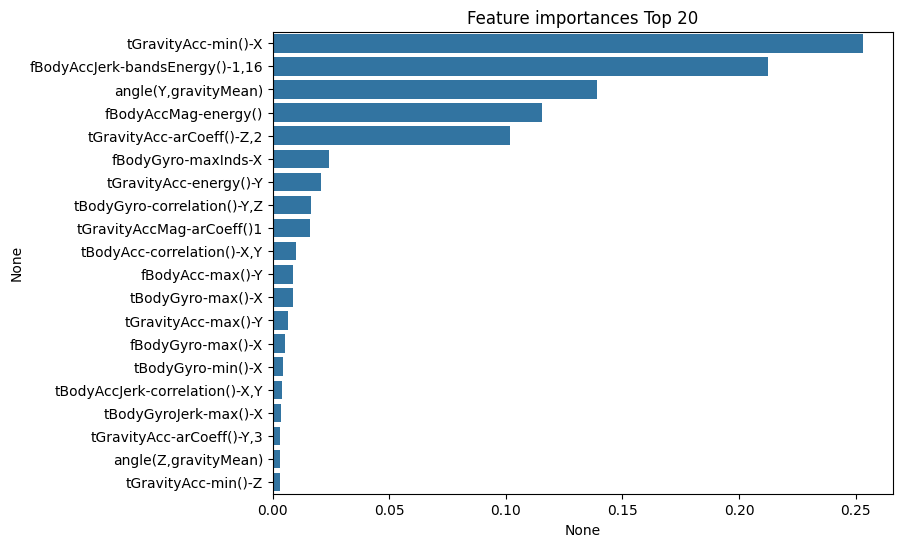

In [ ]:
# feature_importances_ 속성을 이용해 각 피처의 중요도를 알아본다.
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize = (8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

#3.앙상블 학습

In [ ]:
# 앙상블 학습을 통한 분류는 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종예측을 도출하는 기법이다.
# 전통적으로 보팅, 배깅, 부스팅의 세 가지로 나눌 수 있다. 이 외에도 스태깅을 포함한 다양한 앙상블 방법이 있다.
# 보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정한다.
# 차이점은 보팅의 경우 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 것이나
# 배깅은 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행하는 것이다.

In [ ]:
# 앙상블 학습의 특징
# 단일 모델의 약점을 다수의 모델들을 결합하여 보완
# 뛰어난 성능을 가진 모델들로만 구성하는 것 보다 성능이 떨어지더라도 서로 다른 유형의 모델을 섞는 것이 오히려 전체 성능이 도움이 될 수 있음
# 랜덤 포레스트 및 뛰어난 부스팅 알고리즘들은 모두 결정트리알고리즘을 기반으로 적용함
# 결정트리의 단점인 과적합을 수십~수천개의 많은 분류기를 결합해 보완하고 장점인 직관적인 분류 기준은 강화됨

##3-1.보팅유형 - 하드보팅(Hard Voting)과 소프트보팅(Soft Voting)**굵은 텍스트**

In [ ]:
# 보팅의 유형에는 하드보팅과 소프트보팅이 있다.
# 하드보팅은 예측한 결과값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선정하는 것이다.
# 소프트보팅은 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 정한다.
# 일반적으로 하드보팅보다는 소프트보팅이 예측성닝이 좋아서 더 많이 사용된다.

##3-2.보팅 분류기(Voting Classifier)

In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [2]:
# 개별 모델은 로지스틱 회귀와 KNN임.
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)], voting='soft')
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가.
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print('{0} 정확도:{1:4f}'.format(class_name, accuracy_score(y_test,pred)))


Voting 분류기 정확도: 0.9561
LogisticRegression 정확도:0.947368
KNeighborsClassifier 정확도:0.938596


In [ ]:
# 데이터의 특성과 분포 등 다양한 요건에 따라 오히려 기반 분류기 중 가장 좋은 분류기의 성능이 보팅했을 때보다 나을 수도 있다.
# 전반적으로 다른 단일 ML 알고라줌보다 뛰어난 예측성능을 가지는 경우가 많다.
# ML 모델의 성능은 이렇게 다양한 테스트 데이터에 의해 검증되므로 어떻게 높은 유연성을 가지고 현실에 대처할 수 있는가가 중요한 ML 모델의 평가요소가 된다.
# 편향-분산 트레이드오프는 ML 모델이 극복해야 할 중요 과제이다.

#04.배깅(Bagging) - 랜덤 포레스트
